## Image Classification of Pneumonia 
Classifying x-rays of lungs as having pneumonia or not based on image classification with tensorflow and keras.

Data From: 

Source Code/Tutorial from: https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

In [1]:
# !pip3 install numpy matplotlib tensorflow
import tensorflow as tf

In [2]:
import tensorflow
import numpy as np
#!pip3 install opencv-python
#import opencv as cv2
import cv2 
import matplotlib.pyplot as plt
import os
import random
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
#import tensorflow_datasets as tfds
import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

import numpy as np

In [5]:
labels = ['NORMAL', 'PNEUMONIA']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
#Now we can easily fetch our train and validation data.
train1 = get_data('train')
test1 = get_data('test')
val1 = get_data('val')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


<ipython-input-5-627c40e1270b>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


In [7]:
print(train1.shape)
print(test1.shape)
print(val1.shape)
#take random sample of 2000 images 
train = train1[np.random.choice(train1.shape[0], 2000, replace= False)]
#find indices of sample of 304 
temp_indices = np.random.choice(test1.shape[0], 304, replace = False)
#take random indices and put back into validation data 
val = np.concatenate((val1,test1[temp_indices]), axis = 0)
test = np.delete(test1, temp_indices, axis = 0)


(5206, 2)
(624, 2)
(16, 2)


In [8]:
print(train.shape)
print(test.shape)
print(val.shape)

(2000, 2)
(320, 2)
(320, 2)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

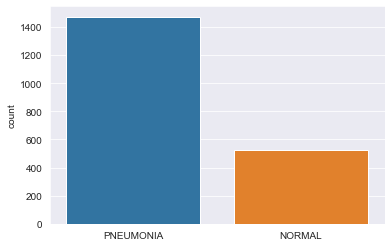

In [9]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("NORMAL")
    else:
        l.append("PNEUMONIA")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'PNEUMONIA')

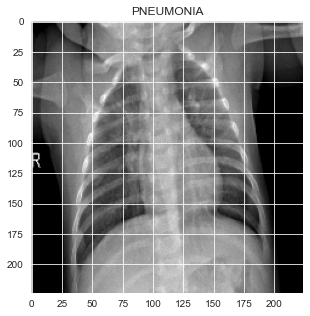

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'PNEUMONIA')

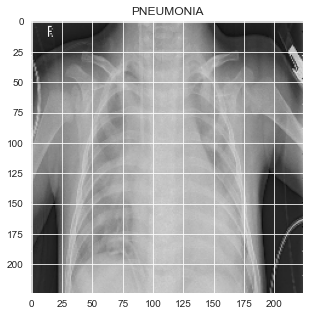

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [12]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [13]:
# data augmentation on the training data

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [14]:
#Step 5:- Define the Model 

#Let’s define a simple CNN model with 3 Convolutional layers followed by max-pooling layers. 
#A dropout layer is added after the 3rd maxpool operation to avoid overfitting

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [16]:
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [17]:
#train model with 500 epochs since the learning rate is really small
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 105s 2s/step - loss: 0.3505 - accuracy: 0.8615 - val_loss: 0.3916 - val_accuracy: 0.8406
Epoch 2/10
63/63 [==============================] - 596s 10s/step - loss: 0.1194 - accuracy: 0.9550 - val_loss: 1.3864 - val_accuracy: 0.6719
Epoch 3/10
63/63 [==============================] - 90s 1s/step - loss: 0.0874 - accuracy: 0.9695 - val_loss: 1.0879 - val_accuracy: 0.7344
Epoch 4/10
63/63 [==============================] - 368s 6s/step - loss: 0.0819 - accuracy: 0.9705 - val_loss: 1.1578 - val_accuracy: 0.7156
Epoch 5/10
63/63 [==============================] - 89s 1s/step - loss: 0.0602 - accuracy: 0.9785 - val_loss: 1.6301 - val_accuracy: 0.7125
Epoch 6/10
63/63 [==============================] - 697s 11s/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 2.0522 - val_accuracy: 0.7156
Epoch 7/10
63/63 [==============================] - 130s 2s/step - loss: 0.0362 - accuracy: 0.9830 - val_loss: 1.3173 - val_accuracy: 0.7594
Epoch 8/10
63/63 [======

[0.8615000247955322, 0.9549999833106995, 0.9695000052452087, 0.9704999923706055, 0.9785000085830688, 0.9894999861717224, 0.9829999804496765, 0.9909999966621399, 0.9890000224113464, 0.9900000095367432]


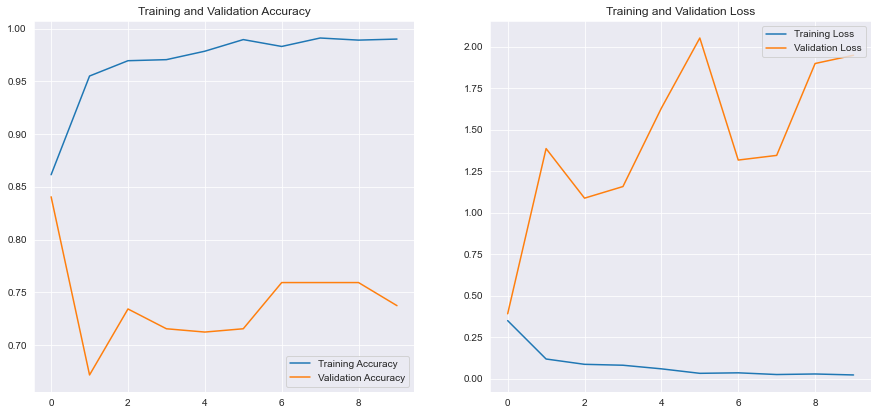

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
x_test=[]
y_test=[]

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Normalize the data
x_test = np.array(x_test) / 255
x_test = np.array(x_test) / 255

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [20]:
test_loss = model.evaluate(x_test, y_test)

10/10 [==============================] - 5s 507ms/step - loss: 0.7987 - accuracy: 0.6281


In [21]:
predictions = model.predict(x_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

In [23]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [24]:
def print_mislabeled_images(class_names, val_images, val_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (y_val == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = x_val[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

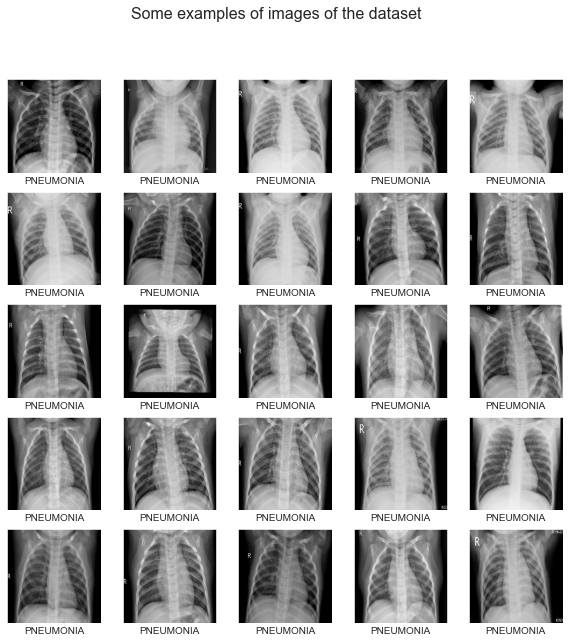

In [26]:
print_mislabeled_images(labels, x_test, y_test, pred_labels)

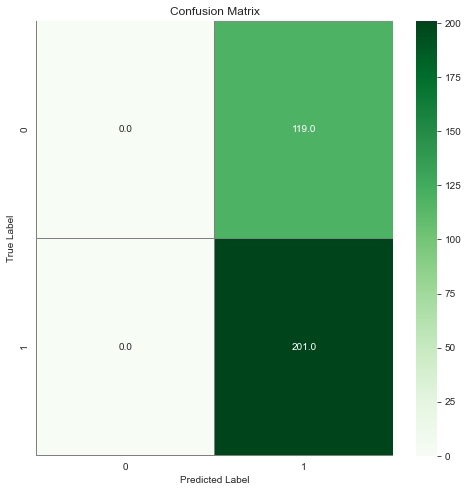

In [42]:
# confusion matrix-- TEST SET
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

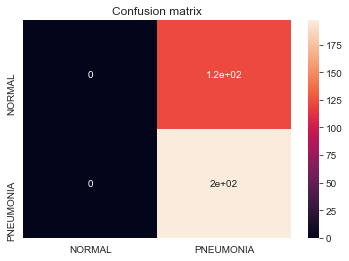

In [28]:
## SCRATCH-- not working
import seaborn as sns
CM = confusion_matrix(y_val, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=labels, 
           yticklabels=labels, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

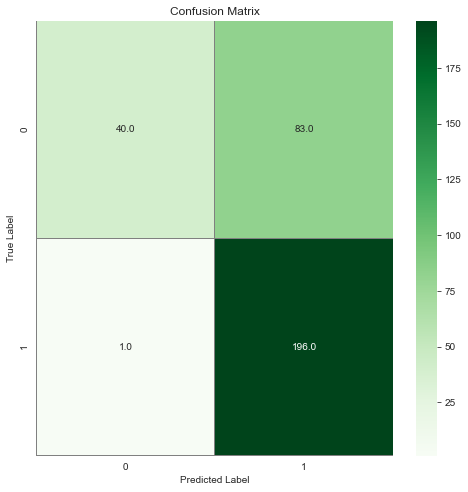

In [41]:
# confusion matrix-- VALIDATION
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_val, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
predictions = (model.predict(x_test)).astype("int32")
print(classification_report(y_test, predictions, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [30]:
print(y_test.shape,predictions.shape)

(320,) (640,)


## Visualizing the features through PCA

In [43]:
train_features = model.predict(x_train)
test_features = model.predict(x_val)

In [50]:
n_train,x = train_features.shape
n_test,x = test_features.shape
numFeatures = x 

In [51]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

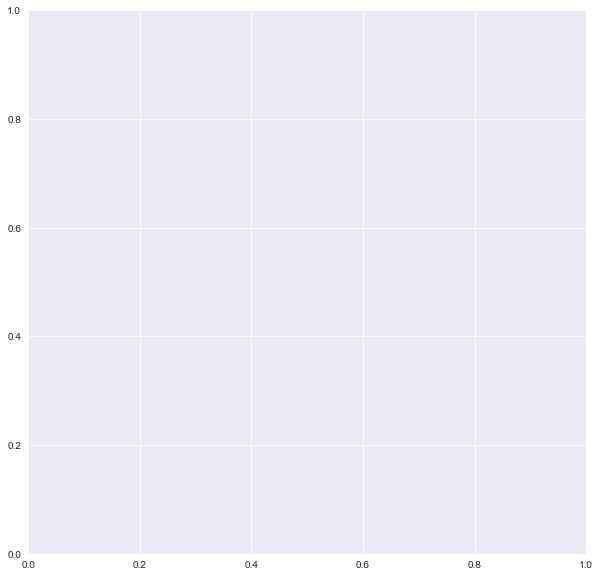

In [54]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(labels):
    plt.scatter(C1[x_train == i], C2[x_train == i], label = label, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()